# Process the tweets dataset to extract neutral data

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Check for one of the excel files

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '../../../'))
sys.path.append(project_root)

In [3]:
UNIQUE_TWEETS_PATH = os.path.join(
    project_root,
    'nepali_sentiment_analysis',
    'dataset',
    'raw',
    'unique_tweets'
)

print(os.listdir(UNIQUE_TWEETS_PATH))

['0_to_8897.xlsx', '17794_to_26691.xlsx', '26691_to_35588.xlsx', '35588_to_44485.xlsx', '44485_to_53382.xlsx', '53382_to_62279.xlsx', '62279_to_71176.xlsx', '71176_to_80073.xlsx', '80073_to_88973.xlsx', '8897_to_17794.xlsx']


In [5]:
df = pd.read_excel(os.path.join(UNIQUE_TWEETS_PATH, '0_to_8897.xlsx'))
df.head()

,id,text,label,Unnamed: 3
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2,NaN
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2,NaN
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2,NaN
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2,NaN
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3,NaN


In [6]:
df = df.drop(columns=['Unnamed: 3', 'id'])
df = df.reset_index(drop=True)
df.head()

,text,label
0,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2
1,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2
2,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2
3,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2
4,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3


In [6]:
print("Info:")
print(df.info())
print("-" * 50)
print("Describe:")
print(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8897 entries, 0 to 8896
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8897 non-null   object
 1   label   8897 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 139.1+ KB
None
--------------------------------------------------
Describe:
             label
count  8897.000000
mean      1.245701
std       0.760190
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000


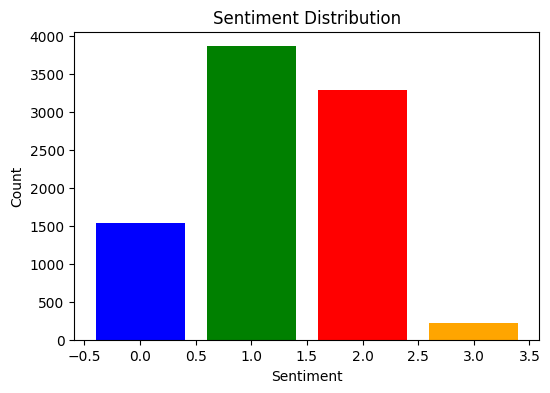

In [10]:
labels_dict = {0: "Neutral", 1: "Positive", 2: "Negative", 3: "Non Political"}
sentiment_counts = df["label"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(labels_dict.keys(), sentiment_counts, color=["blue", "green", "red", "orange"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [8]:
df_label_0 = df[df['label'] == 0]
# Reset index
df_label_0 = df_label_0.reset_index(drop=True)
df_label_0.head()

,text,label
0,@DilipMuna पुन निर्वाचन गरे पनि यस्तै हुने हो ...,0
1,@juction4love क्या अचम्मकाे नगरपालिका छ डाेजरम...,0
2,प्युठान नगरपालिका र नेपाल स्वयंसेवक राष्ट्रिय ...,0
3,कपिलवस्तुको शिवराज नगरपालिका–२ का बासिन्दाले प...,0
4,कपिलवस्तुको शिवराज नगरपालिका–२ का बासिन्दाले ५...,0


In [9]:
import re
from utils.preprocess import remove_html_tags, remove_extra_whitespace

In [10]:
from deep_translator import GoogleTranslator
import re


def translate_english_to_nepali_deep_translator(text):
    # Initialize the translator
    translator = GoogleTranslator(source='en', target='ne')

    # Regex to find English phrases or words
    english_phrases = re.findall(r'[a-zA-Z0-9 ()]+', text)

    # Translate each phrase contextually
    for phrase in english_phrases:
        # Avoid translating small tokens or unnecessary spaces
        if len(phrase.strip()) > 1:
            translated = translator.translate(phrase.strip())
            text = text.replace(phrase, f" {translated} ")

    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [11]:
def remove_stopwords(text):
    with open(os.path.join(project_root, 'nepali_sentiment_analysis', 'dataset', 'nepali_stopwords.txt'), 'r', encoding='utf-8') as file:
        stopwords = file.read().split('\n')
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

In [12]:
import re


def preprocess(text):
    """
    Preprocesses a text string to retain only Nepali characters, numbers, and specific punctuation.
    Removes HTML tags, mentions, URLs, and extra whitespaces.
    
    Args:
        text (str): The input text to preprocess.
    
    Returns:
        str: The preprocessed text.
    """
    # Remove HTML tags
    text = remove_html_tags(text)

    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http.?://[^\s]+[\s]?', '', text)

    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Retain English characters, Nepali characters, nepali numbers, english numbers, and specific punctuation
    text = re.sub(r'[^\u0900-\u097Fa-zA-Z0-9०-९।?]', ' ', text)

    # Translate English characters to Nepali characters
    text = translate_english_to_nepali_deep_translator(text)

    # Finally, retain only the Nepali characters, numbers, and specific punctuation
    text = re.sub(r'[^\u0900-\u097F०-९।?]', ' ', text)

    # remove stopwords
    text = remove_stopwords(text)

    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = remove_extra_whitespace(text)

    return text

In [13]:
text = df_label_0.iloc[15]['text']

cleaned_text = preprocess(text)

print(f"Original text:\n{text}")
print(f"\nCleaned text:\n{cleaned_text}")

Original text:
@kedar_sharmaa को ओलि को देउवा त्यो नि बताउनुस 🤣

Cleaned text:
ओलि देउवा नि बताउनुस


In [14]:
from tqdm import tqdm
tqdm.pandas()

# Apply the preprocess_text function to the 'text' column
df_label_0.loc[:, 'text'] = df_label_0['text'].progress_apply(preprocess)

100%|██████████| 1532/1532 [03:14<00:00,  7.89it/s]


In [15]:
df_label_0.head()

,text,label
0,पुन निर्वाचन गरे यस्तै हुने हो । निर्वाचन कति ...,0
1,क्या अचम्मकाे नगरपालिका डाेजरम्यान बालेनकाे।,0
2,प्युठान नगरपालिका नेपाल स्वयंसेवक राष्ट्रिय सम...,0
3,कपिलवस्तुको शिवराज नगरपालिका २ का बासिन्दाले प...,0
4,कपिलवस्तुको शिवराज नगरपालिका २ का बासिन्दाले ५...,0


In [16]:
print(df_label_0[df_label_0['text'].str.contains(r'[a-zA-Z]')])

Empty DataFrame
Columns: [text, label]
Index: []


In [17]:
# check for duplicate rows
df_label_0.duplicated().sum()


104

In [18]:
df_label_0[df_label_0.duplicated(subset=['text'], keep=False)]

,text,label
10,विश्वकपमा ब्राजिल अर्जेन्टिना मलाई नेपाली राजन...,0
16,विश्वकपमा ब्राजिल अर्जेन्टिना मलाई नेपाली राजन...,0
41,राप्रपा केन्द्रीय कार्य सम्पादन समितिको बैठक श...,0
42,राप्रपा केन्द्रीय कार्य सम्पादन समितिको बैठक श...,0
44,राप्रपा केन्द्रीय कार्य सम्पादन समितिको बैठक श...,0
...,...,...
1399,झापा ३ १२०० मत गन्दा राजेन्द्र लिङ्देन राप्रपा...,0
1416,झापा ३ १२०० मत गन्दा राजेन्द्र लिङ्देन राप्रपा...,0
1419,डडेल्धुरा प्रतिनिधिसभा शेरबहादुर देउवा नेपाली ...,0
1483,अहिलेकै मत प्रतिशत कायम रहे ६ वटा राष्ट्रिय दल...,0


In [19]:
# drop duplicates
df_label_0 = df_label_0.drop_duplicates(subset=['text'], keep='first')

In [20]:
df_label_0.duplicated().sum()

0

In [21]:
# save the cleaned data
df_label_0.to_csv("cleaned_data.csv", index=False)

---

## Process all the excel files to extract neutral data

In [23]:
# Initialize an empty DataFrame to accumulate the results
all_data = pd.DataFrame(columns=['Sentiment', 'Sentences'])

# Loop through all Excel files in the directory
for file in os.listdir(UNIQUE_TWEETS_PATH):
    if file.endswith('.xlsx') or file.endswith('.xls'):
        print(f"Processing {file}...")

        # Load the Excel file
        file_path = os.path.join(UNIQUE_TWEETS_PATH, file)
        df = pd.read_excel(file_path)

        # Reset index and drop duplicates based on the 'text' column
        if 'text' in df.columns:
            df = df.reset_index(drop=True).drop_duplicates(subset=['text'])

        # Ensure the required columns exist
        if 'text' in df.columns and 'label' in df.columns:
            # Keep only the 'text' and 'label' columns
            df = df[['text', 'label']]

            # Filter rows where label is 0
            df_label_0 = df[df['label'] == 0]

            # Split the sentences into separate rows based on '।' or '?'
            df_split = df_label_0['text'].str.split(r'[।?]').explode().str.strip().reset_index(drop=True)

            # Repeat the Sentiment for each sentence
            df_final_label_0 = df_label_0.loc[
                df_label_0.index.repeat(
                    df_label_0['text'].str.split(r'[।?]').apply(len)
                )].reset_index(drop=True)

            # Align the sentiment column with the newly split sentences
            df_final_label_0['text'] = df_split

            # Reset the index for the final DataFrame
            df_final_label_0 = df_final_label_0.reset_index(drop=True)

            # Preprocess the 'text' column
            df_final_label_0['text'] = df_final_label_0['text'].progress_apply(preprocess)

            # Drop rows with null, empty, or whitespace-only strings in 'text'
            df_final_label_0 = df_final_label_0.loc[df_final_label_0['text'].notna()]
            df_final_label_0 = df_final_label_0.loc[df_final_label_0['text'].str.strip() != '']

            # Rename columns to match desired output
            df_final_label_0 = df_final_label_0.rename(columns={
                'label': 'Sentiment',
                'text': 'Sentences'
            })

            # Append the processed data to the accumulated DataFrame
            all_data = pd.concat([all_data, df_final_label_0], ignore_index=True)

            print(f"Processed file: {file}. Total records: {len(df_final_label_0)}")

# Ensure correct datatypes for the final DataFrame
all_data['Sentiment'] = all_data['Sentiment'].astype(int)
all_data['Sentences'] = all_data['Sentences'].astype(str)

# Output processing status
print(f"Processed all files. Total records: {len(all_data)}")

Processing 0_to_8897.xlsx...


100%|██████████| 2563/2563 [03:04<00:00, 13.90it/s]


Processed file: 0_to_8897.xlsx. Total records: 1966
Processing 17794_to_26691.xlsx...


100%|██████████| 596/596 [00:35<00:00, 16.94it/s]


Processed file: 17794_to_26691.xlsx. Total records: 433
Processing 26691_to_35588.xlsx...


100%|██████████| 873/873 [02:26<00:00,  5.94it/s]


Processed file: 26691_to_35588.xlsx. Total records: 760
Processing 35588_to_44485.xlsx...


100%|██████████| 1283/1283 [04:32<00:00,  4.72it/s]


Processed file: 35588_to_44485.xlsx. Total records: 1199
Processing 44485_to_53382.xlsx...


100%|██████████| 1076/1076 [04:35<00:00,  3.91it/s]


Processed file: 44485_to_53382.xlsx. Total records: 1013
Processing 53382_to_62279.xlsx...


100%|██████████| 216/216 [00:12<00:00, 17.52it/s]


Processed file: 53382_to_62279.xlsx. Total records: 158
Processing 62279_to_71176.xlsx...


100%|██████████| 46/46 [00:01<00:00, 27.64it/s]


Processed file: 62279_to_71176.xlsx. Total records: 28
Processing 71176_to_80073.xlsx...


100%|██████████| 228/228 [00:06<00:00, 36.21it/s]


Processed file: 71176_to_80073.xlsx. Total records: 147
Processing 80073_to_88973.xlsx...


100%|██████████| 296/296 [00:15<00:00, 19.25it/s]


Processed file: 80073_to_88973.xlsx. Total records: 203
Processing 8897_to_17794.xlsx...


100%|██████████| 560/560 [00:57<00:00,  9.75it/s]

Processed file: 8897_to_17794.xlsx. Total records: 437
Processed all files. Total records: 6344


In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6344 entries, 0 to 6343
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  6344 non-null   int32 
 1   Sentences  6344 non-null   object
dtypes: int32(1), object(1)
memory usage: 74.5+ KB


In [25]:
all_data.head()

,Sentiment,Sentences
0,0,पुन निर्वाचन गरे यस्तै हुने हो
1,0,निर्वाचन कति गरिरहने
2,0,शासन व्यवस्था चुनाव पध्दति फेर्नु एउटा उपचार हो
3,0,क्या अचम्मकाे नगरपालिका डाेजरम्यान बालेनकाे
4,0,प्युठान नगरपालिका नेपाल स्वयंसेवक राष्ट्रिय सम...


In [26]:
# locate the first instance of column 'Sentences' containing the exact match of ''
all_data[all_data['Sentences'] == '']

,Sentiment,Sentences


In [27]:
# locate the first instance of column 'Sentences' containing the exact match of ' '
all_data[all_data['Sentences'] == ' ']

,Sentiment,Sentences


In [28]:
# check for null values
all_data.isnull().sum()

Sentiment    0
Sentences    0
dtype: int64

In [29]:
# search for duplicate rows, based on 'Sentences' column
all_data.duplicated(subset=['Sentences']).sum()

388

In [30]:
# show the duplicate rows based on 'Sentences' column
all_data[all_data.duplicated(subset=['Sentences'], keep=False)].head()

,Sentiment,Sentences
12,0,विश्वकपमा ब्राजिल अर्जेन्टिना मलाई नेपाली राजन...
19,0,विश्वकपमा ब्राजिल अर्जेन्टिना मलाई नेपाली राजन...
36,0,शेर बहादुर देउवा
42,0,राप्रपा
51,0,राप्रपा केन्द्रीय कार्य सम्पादन समितिको बैठक श...


In [31]:
# check the rows containing only value 'राप्रपा'
all_data[all_data['Sentences'] == 'राप्रपा']

,Sentiment,Sentences
42,0,राप्रपा
1079,0,राप्रपा
2040,0,राप्रपा
2134,0,राप्रपा
2137,0,राप्रपा
6312,0,राप्रपा


In [32]:
all_data[all_data['Sentences'] == 'शेर बहादुर देउवा']

,Sentiment,Sentences
36,0,शेर बहादुर देउवा
2363,0,शेर बहादुर देउवा


In [33]:
# Keep the first instance of duplicates and remove others
all_data = all_data.drop_duplicates(subset=['Sentences'], keep='first')

In [34]:
all_data[all_data['Sentences'] == 'शेर बहादुर देउवा']

,Sentiment,Sentences
36,0,शेर बहादुर देउवा


In [35]:
all_data[all_data['Sentences'] == 'राप्रपा']

,Sentiment,Sentences
42,0,राप्रपा


In [36]:
all_data.shape

(5956, 2)

---

Finally, check for null and duplicate values in the dataset after cleaning the data.

In [37]:
all_data.duplicated().sum()

0

In [38]:
# check for null values
all_data.isnull().sum()

Sentiment    0
Sentences    0
dtype: int64

---

Process one last time to remove any extra spaces and save the dataset as a csv file.

In [39]:
# process the 'Sentences' column to remove extra whitespaces
all_data['Sentences'] = all_data['Sentences'].str.strip()

In [40]:
# Reset the index of the DataFrame
all_data = all_data.reset_index(drop=True)

In [41]:
all_data.head()

,Sentiment,Sentences
0,0,पुन निर्वाचन गरे यस्तै हुने हो
1,0,निर्वाचन कति गरिरहने
2,0,शासन व्यवस्था चुनाव पध्दति फेर्नु एउटा उपचार हो
3,0,क्या अचम्मकाे नगरपालिका डाेजरम्यान बालेनकाे
4,0,प्युठान नगरपालिका नेपाल स्वयंसेवक राष्ट्रिय सम...


In [46]:
# remove rows with empty 'Sentences' column or if the sentence is only a single character
all_data = all_data.loc[all_data['Sentences'].str.len() > 1]

In [47]:
all_data.shape

(5953, 2)

---

## Save the cleaned data to csv file

In [48]:
OUTPUT_DIR = os.path.join(
    project_root,
    'nepali_sentiment_analysis',
    'dataset',
    'cleaned',
)

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

OUTPUT_PATH = os.path.join(OUTPUT_DIR, 'cleaned_neutral_data.csv')

all_data.to_csv(OUTPUT_PATH, index=False)
if os.path.exists(OUTPUT_PATH):
    print(f"File successfully saved at {OUTPUT_PATH}")
else:
    print("Failed to save the file.")

File successfully saved at c:\Users\Suyash Shrestha\Personal\_Nepali_news_project\Nepali_News_algorithms\news_algorithms\nepali_sentiment_analysis\dataset\cleaned\cleaned_neutral_data.csv
